# Titanic - Machine Learning from Disaster

In [17]:
# Data processing
import numpy as np
import pandas as pd

# # Visualisations
# import matplotlib.pyplot as plt
# import seaborn as sns

# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Accessin utils scripts
import sys
sys.path.append(r'C:/Users/Smithy/GitHub_Repositories/exploratory-data-analysis/source_code/')

from eda_utility import count_columns_by_dtype, summarize_numeric_columns, plot_histograms_and_boxplots, summarize_categorical_columns

## Raw Data

In [18]:
df_train = pd.read_csv('raw_data/train.csv')
df_train.shape

(891, 12)

In [19]:
df_test = pd.read_csv('raw_data/test.csv')
df_test.shape

(418, 11)

## Processing for Understandability

Using the data dictionary and common sense to change column headers, column ordering.

In [20]:
# Change the column names according to the data dictionary
new_col_names = {'Pclass': 'Ticket Class', 'SibSp': 'Num Siblings/Spouses Onboard', 'Parch': 'Num Parents/Children Onboard',
                  'Ticket': 'Ticket Num', 'Cabin': 'Cabin Num', 'Embarked': 'Embarkment Port'}
df_train.rename(columns=new_col_names, inplace=True)
df_test.rename(columns=new_col_names, inplace=True)

# Change the column order so it is easier to follow
new_col_order = ['PassengerId', 'Name', 'Sex', 'Age', 'Num Siblings/Spouses Onboard', 'Num Parents/Children Onboard',
                  'Ticket Num', 'Ticket Class', 'Fare', 'Cabin Num', 'Embarkment Port', 'Survived']
df_train = df_train[new_col_order]
df_test = df_test[new_col_order[:-1]]

# Use the data dictionary to replace some values
ticket_class_mapping = {1: '1st', 2: '2nd', 3: '3rd'}
df_train['Ticket Class'] = df_train['Ticket Class'].replace(ticket_class_mapping)
df_train['Ticket Class'] = pd.Categorical(df_train['Ticket Class'])
df_test['Ticket Class'] = df_test['Ticket Class'].replace(ticket_class_mapping)
df_test['Ticket Class'] = pd.Categorical(df_test['Ticket Class'])

embarkment_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
df_train['Embarkment Port'] = df_train['Embarkment Port'].replace(embarkment_mapping)
df_test['Embarkment Port'] = df_test['Embarkment Port'].replace(embarkment_mapping)

df_train.head(5)

,PassengerId,Name,Sex,Age,Num Siblings/Spouses Onboard,Num Parents/Children Onboard,Ticket Num,Ticket Class,Fare,Cabin Num,Embarkment Port,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,3rd,7.2500,NaN,Southampton,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1st,71.2833,C85,Cherbourg,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,3rd,7.9250,NaN,Southampton,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1st,53.1000,C123,Southampton,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,3rd,8.0500,NaN,Southampton,0


## Target Selection

Select the target variable. In this instance it is the 'Survived' column.

## Exploratory Data Analysis(EDA)

1. Check the datatypes of our dataset

In [21]:
count_columns_by_dtype(df_train)

,Data Type,Count
0,category,1
1,float64,2
2,int64,4
3,object,5


2. Inspect the numerical variables

In [22]:
summarize_numeric_columns(df_train)

,Column,Column Type,Non-NaN Count,NaN Count,Zero Count,Mean,Std,Min,25%,Median,75%,Max,Num Lower Outliers,Num Upper Outliers,Skew
0,PassengerId,int64,891,0,0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000,0,0,0.000000
1,Age,float64,714,177,0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,0,11,0.388290
2,Num Siblings/Spouses Onboard,int64,891,0,608,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,0,46,3.689128
3,Num Parents/Children Onboard,int64,891,0,678,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,0,213,2.744487
4,Fare,float64,891,0,15,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,0,116,4.779253
5,Survived,int64,891,0,549,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,0,0,0.477717


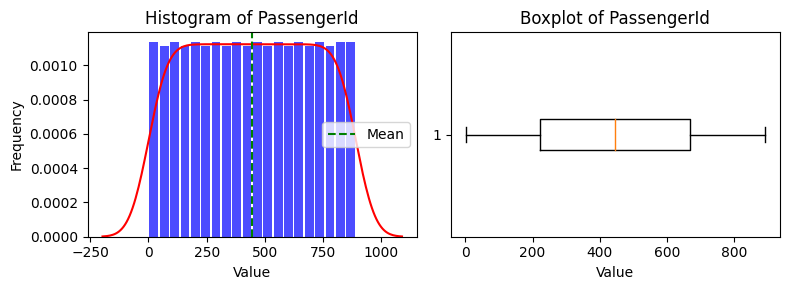

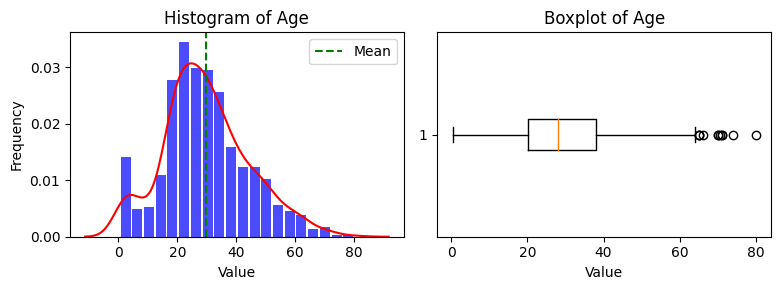

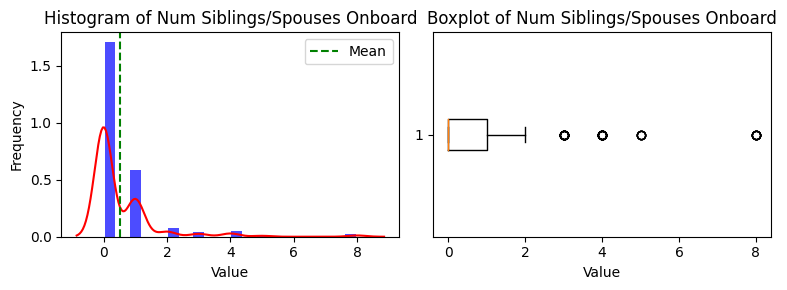

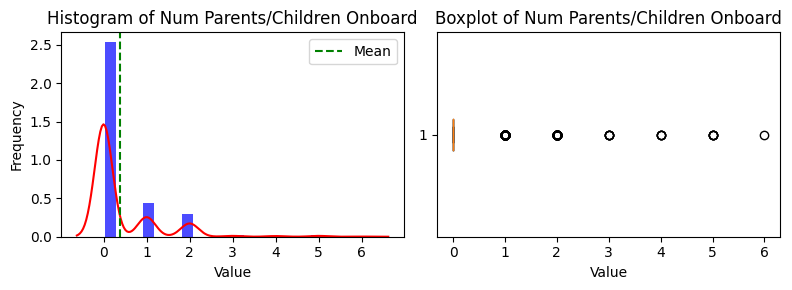

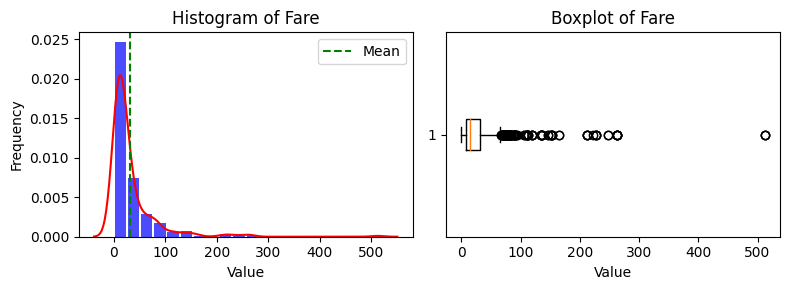

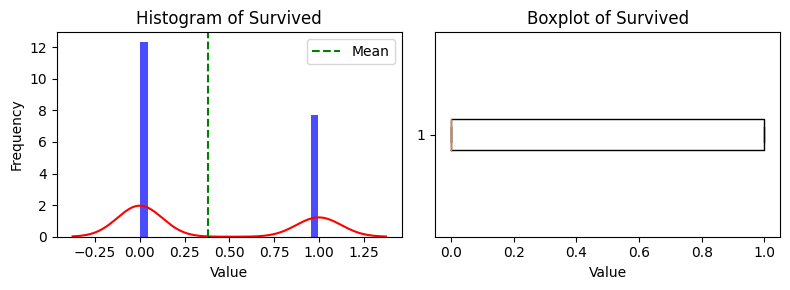

In [23]:
plot_histograms_and_boxplots(df_train)

3. Inspect the Categorical variables

In [24]:
summarize_categorical_columns(df_train)

,Column,Column Type,Non-None Count,None Count,Empty Count,Num Unique,Mode,Mode Occurrences
0,Name,object,891,0,0,891,"Abbing, Mr. Anthony",1
1,Sex,object,891,0,0,2,male,577
2,Ticket Num,object,891,0,0,681,1601,7
3,Ticket Class,category,891,0,0,3,3rd,491
4,Cabin Num,object,204,687,0,148,B96 B98,4
5,Embarkment Port,object,889,2,0,4,Southampton,644


## Initial Ideas

* **PassengerId**: holds no predictive power and should not be included in the ML models
* **Name**: is unique across all records so will hold no predictive power. However, the surname and the title may be useful in identifying passengers who might be related. This should be extracted.
* **Sex**: of the passengers is unevenly distributed. This column can also be converted to binary
* **Age**
* **Num Siblings/Spouses Onboard**
* **Num Parents/Children Onboard**
* **Ticket Num**
* **Ticket Class**
* **Fare**
* **Cabin Num**
* **Embarkment Port**
* **Survived**: is unevenly distributed. 549 instances of zero, 442 instances of 1. This could lead to a bias towards the majority class.


# Feature Engineering

In [25]:
# # Resample the dataset

# # Separate features and target variable
# X = df_train.drop('Survived', axis=1)
# y = df_train['Survived']

# # Define the resampling pipeline
# resampling_pipeline = Pipeline([
#     ('oversample', SMOTE(sampling_strategy=0.5)),  # Oversample the minority class to have 50% of the majority class size
#     ('undersample', RandomUnderSampler(sampling_strategy=1.0))  # Undersample the majority class to have the same size as the minority class
# ])

# # Apply the resampling pipeline
# X_resampled, y_resampled = resampling_pipeline.fit_resample(X, y)

# # Convert the resampled data back to a DataFrame (optional)
# X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
# y_resampled_df = pd.DataFrame(y_resampled, columns=['Survived'])
# resampled_train_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# resampled_train_df